# Assignment 2_Exercise7: Regularization

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import defaultdict

In [77]:
data = np.loadtxt('microchips.csv' ,delimiter=',')

## Exe7.Question1. Perform logistic regression

In [78]:
def mapFeature(X1,X2,D):
    one = np.ones((X1.shape[0],1))
    Xe = np.c_[one,X1,X2] 
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j 
            Xnew = Xnew.reshape(-1,1) 
            Xe = np.append(Xe,Xnew,1) 
    return Xe

In [79]:
Xe=mapFeature(data[:, 0],data[:, 1],2)
y = data[:, 2]

In [80]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh

In [81]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',C=100.0,tol=1e-6,max_iter=1000)
logreg_l2 = LogisticRegression(solver='lbfgs',C=1,penalty='l2',tol=1e-6,max_iter=1000)


## Exe7.Question2. Plot Decision Boundaries (regularized  D=2)

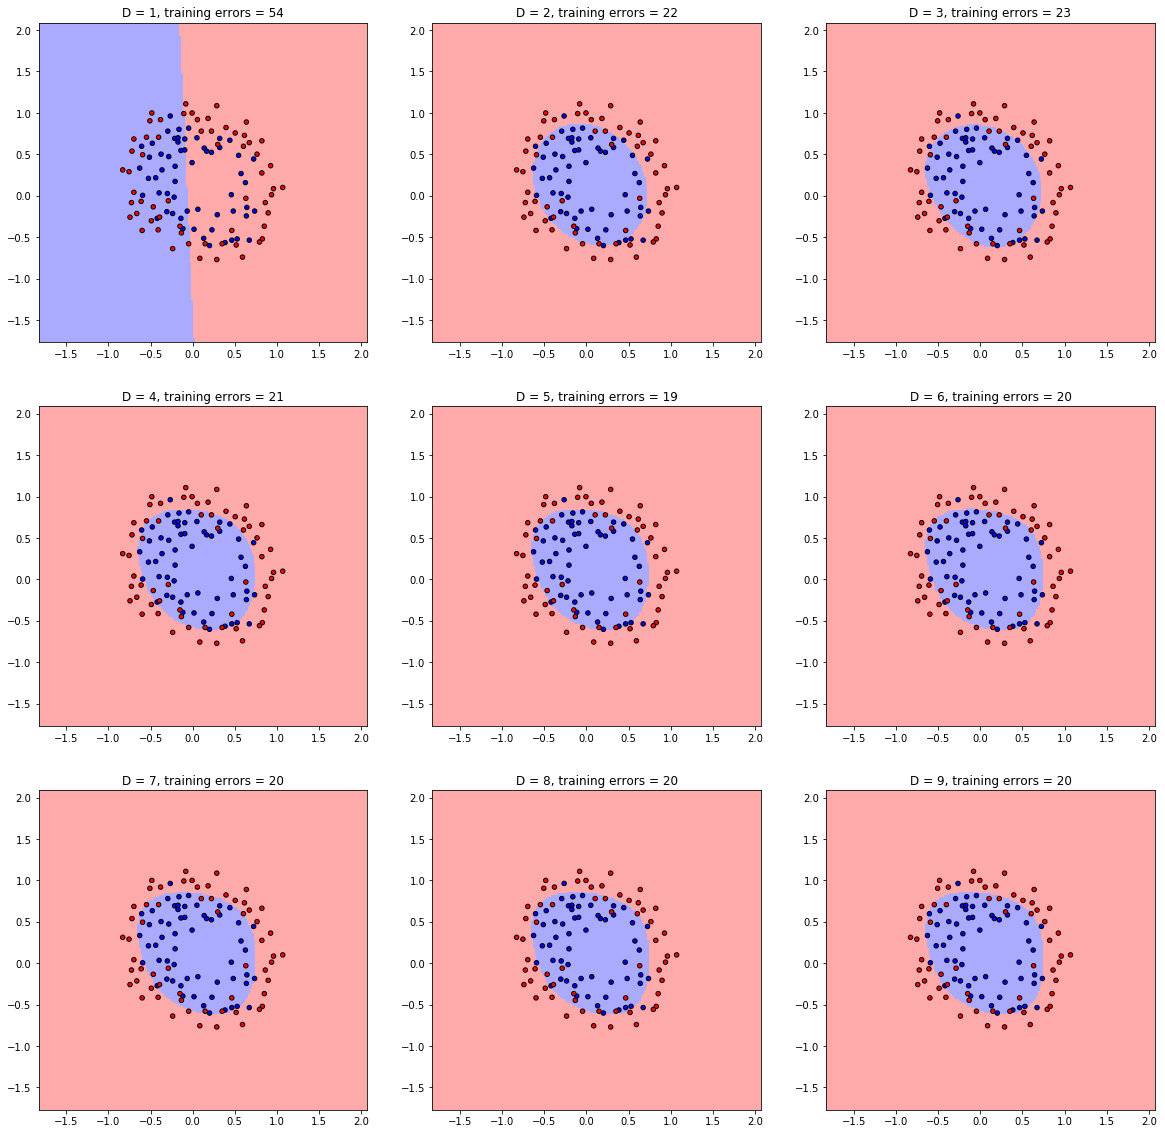

In [82]:
plt.figure(figsize=(20, 20))


for i in range(1,10):
    D = i
    Xe=mapFeature(data[:, 0],data[:, 1],D)
    logreg_l2.fit(Xe,y)
    predictions = logreg_l2.predict(Xe)
    
    error = ((predictions == y)== False).sum()
    
    x_min, x_max = Xe[:, 1].min() - 1, Xe[:, 1].max() + 1
    y_min, y_max = Xe[:, 2].min() - 1, Xe[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    mCoordinates=np.c_[xx.ravel(), yy.ravel()]
    mc = mapFeature(mCoordinates[:,0],mCoordinates[:,1],D)
    Z = logreg_l2.predict(mc)
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3,3, i)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(Xe[:, 1], Xe[:, 2], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("D = %i, training errors = %i" % (D, error))

    
plt.show()

It was obsereved that, higher degrees turn out to Overfitting. It seems that degree=5 is best model, since it has minimum training error = 19.

## Exe7.Question3. Perform Cross_Validation on unregularized and regularized model 

In [83]:
X = data[:,:2]
y = data[:, 2]

test_error_l2 = defaultdict(list)
test_error = defaultdict(list)

## regularized + cross validation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(X)
for i in range(1,10):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        D = i
        X_train_e=mapFeature(X_train[:, 0],X_train[:, 1],D)
        logreg_l2.fit(X_train_e,y_train)
        
        X_test_e=mapFeature(X_test[:, 0],X_test[:, 1],D)

        predictions = logreg_l2.predict(X_test_e)
        error = ((predictions == y_test)== False).sum()
        test_error_l2[D].append(error)

## unregularized + cross validation

In [85]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for i in range(1,10):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        D = i
        X_train_e=mapFeature(X_train[:, 0],X_train[:, 1],D)
        logreg.fit(X_train_e,y_train)
        
        X_test_e=mapFeature(X_test[:, 0],X_test[:, 1],D)

        predictions = logreg.predict(X_test_e)
        error = ((predictions == y_test)== False).sum()
        test_error[D].append(error)

In [86]:
means_te_er = []
means_te_er_l2 = []

for i in range(9):
    means_te_er_l2.append(np.array(test_error_l2[i+1]).mean())
    means_te_er.append(np.array(test_error[i+1]).mean())


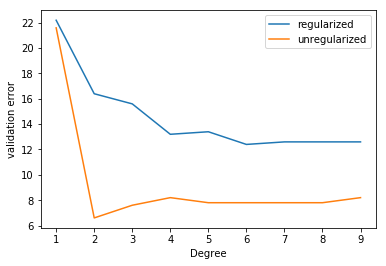

In [88]:
plt.plot(list(test_error_l2.keys()), means_te_er_l2,label='regularized')
plt.plot(list(test_error_l2.keys()), means_te_er,label='unregularized')

plt.xlabel('Degree')
plt.ylabel('validation error')

plt.legend()
plt.show()

In Conclusion, in comparison in the plot in Exe4, by using regularized we some extent avoid overfitting. Also, based on our last plot for regularized, and unregularized, which it shows validation error based on degrees, we can see that regularized prevent overfitting.